In [208]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [240]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

num_classes = len(np.unique(y_train))
print(num_classes)


y_train = keras.utils.to_categorical(y_train,num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

print(y_train[0])

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255


10
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [241]:

model = Sequential([
  layers.Input((32, 32, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(10, activation='softmax')
])

In [242]:

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [243]:
model.summary()

Model: "sequential_43"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_103 (Conv2D)             │ (None, 32, 32, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_103               │ (None, 16, 16, 16)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_37 (Flatten)            │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_75 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 526,154 (2.01 MB)

 Trainable params: 526,154 (2.01 MB)

 Non-trainable params: 0 (0.00 B)

In [244]:
epochs=3
history = model.fit(
  X_train,
  y_train,
  validation_data= (X_test, y_test),
  epochs=epochs
)

Epoch 1/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3884 - loss: 1.6970 - val_accuracy: 0.5404 - val_loss: 1.2927
Epoch 2/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5686 - loss: 1.2251 - val_accuracy: 0.5847 - val_loss: 1.1835
Epoch 3/3
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6161 - loss: 1.0979 - val_accuracy: 0.5996 - val_loss: 1.1511


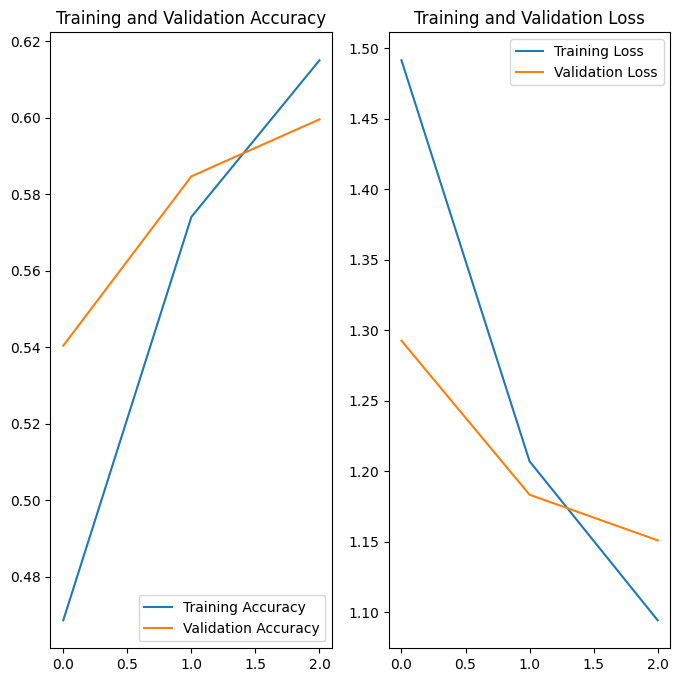

In [245]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [246]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6048 - loss: 1.1413
Test accuracy: 0.5996000170707703


In [256]:
model_improved = keras.Sequential(
  [
    layers.Input((32,32,3)),
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
  ]
)



In [251]:
model_improved.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

__Optimizers__

Here we experimented with different optimization functions:

SGD Produced a final 10/10 Epoch result of:

    Epoch 10/10
    1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5552 - loss: 1.2473 - val_accuracy: 0.5917 - val_loss: 1.1627


Where as Adam produced a final 10/10 Epoch result of:

    Epoch 10/10
    1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6944 - loss: 0.8643 - val_accuracy: 0.7070 - val_loss: 0.8386

In [252]:
epochs=10
history = model_improved.fit(
  X_train,
  y_train,
  validation_data= (X_test, y_test),
  epochs=epochs
)

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.5298 - loss: 1.3203 - val_accuracy: 0.5787 - val_loss: 1.1995
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.5790 - loss: 1.1901 - val_accuracy: 0.6146 - val_loss: 1.0962
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6077 - loss: 1.1106 - val_accuracy: 0.6274 - val_loss: 1.0935
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6248 - loss: 1.0635 - val_accuracy: 0.6546 - val_loss: 0.9913
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6418 - loss: 1.0020 - val_accuracy: 0.6720 - val_loss: 0.9420
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6572 - loss: 0.9725 - val_accuracy: 0.6885 - val_loss: 0.8959
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6705 - loss: 0.9417 - val_accuracy: 0.6492 - val_loss: 1.0216
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6824 - loss: 0

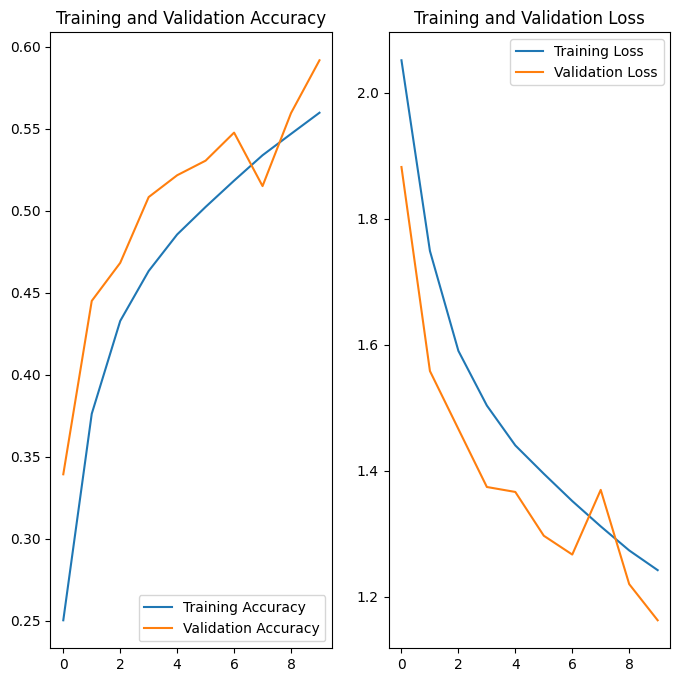

In [250]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()